# Sile v ležajih - simbolično

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

In [14]:
rho = 3200. # density
e = 0.0001 # excentricity
a = 0.16
b = 0.16

t1 = 0.17
R = 0.45
g = 9.81
alfa = 10.
omega0 = 2024.2

In [15]:
t = sym.symbols('t')

In [16]:
J = lambda R, rho, t: np.pi*rho*R**4*t/2
m = lambda R, rho, t: np.pi*R**2*t*rho

In [17]:
phi = lambda t: omega0*t + alfa*t**2/2

In [18]:
Fc = lambda t: m(R, rho, t1)*e*sym.diff(phi(t), t)**2
Ft = lambda t: m(R, rho, t1)*e*sym.diff(phi(t), t, t)
Jxz = m(R, rho, t1)*a*e
Jyz = 0

In [8]:
Ax, Ay, Bx, By = sym.symbols('Ax Ay Bx By')

In [9]:
res = sym.solve([Ax + Bx + Fc(t),
           Ay + By - Ft(t),
           -By*(a + b) + Jxz*sym.diff(phi(t),t,t) - Jyz*sym.diff(phi(t),t)**2,
           Bx*(a + b) + Jxz*sym.diff(phi(t),t)**2 + Jyz*sym.diff(phi(t),t,t)],
          [Ax, Ay, Bx, By])
res

{Ax: -1.73038923359726*t**2 - 700.530777329515*t - 70900.7199735202,
 Ay: 0.173038923359726,
 Bx: -1.73038923359726*t**2 - 700.530777329515*t - 70900.7199735202,
 By: 0.173038923359726}

In [10]:
Ax1, Ay1, Bx1, By1 = list(res.values())

In [11]:
Ax = 1/2*m(R, rho, t1)*g + Ax1*sym.cos(phi(t)) - Ay1*sym.sin(phi(t))
Ay = Ax1*sym.sin(phi(t)) + Ay1*sym.cos(phi(t))
Bx = 1/2*m(R, rho, t1)*g + Bx1*sym.cos(phi(t)) - By1*sym.sin(phi(t))
By = Bx1*sym.sin(phi(t)) + By1*sym.cos(phi(t))
Ax, Ay, Bx, By = sym.lambdify(t, Ax), sym.lambdify(t, Ay), sym.lambdify(t, Bx), sym.lambdify(t, By)

(0, 0.008299575140796364)

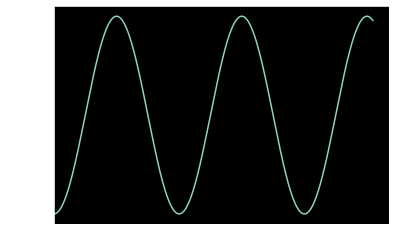

In [13]:
t0 = 16*1/omega0
time = np.linspace(0, t0, 1000)
plt.plot(time, Ax(time))
plt.xlim(left=0)